In [1]:
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE

In [2]:
# read the CSV file
df = pd.read_csv(r'C:\Users\Saemi\OneDrive\Education\WGU\D208 Predictive Modeling (Python & R)\PA2 - Logistic Regression Modeling\medical_clean.csv')
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# visually inspect the dataframe. Explorate the data and spot the problems
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [5]:
df['Gender'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [6]:
df['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [7]:
df['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [8]:
df['HighBlood'].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [9]:
df['Stroke'].value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [10]:
df['Complication_risk'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [11]:
df['Overweight'].value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [12]:
df['Asthma'].value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [13]:
df['ReAdmis'].value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [14]:
df['Arthritis'].value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [15]:
df['Diabetes'].value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [16]:
df['Hyperlipidemia'].value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [17]:
df['BackPain'].value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [18]:
df['Services'].value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [19]:
df['Soft_drink'].value_counts()

Soft_drink
No     7425
Yes    2575
Name: count, dtype: int64

In [20]:
df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [21]:
df['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [22]:
df['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [23]:
search_cols = ['Age', 'Gender', 'VitD_levels', 'Initial_admin', 'HighBlood', 'Stroke', 'ReAdmis', 'Asthma',
               'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 
               'Services', 'Soft_drink', 'Initial_days', 'TotalCharge', 'Doc_visits']
medical_search = df[search_cols]
medical_search.head()

,Age,Gender,VitD_levels,Initial_admin,HighBlood,Stroke,ReAdmis,Asthma,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Services,Soft_drink,Initial_days,TotalCharge,Doc_visits
0,53,Male,19.141466,Emergency Admission,Yes,No,No,Yes,Medium,No,Yes,Yes,No,Yes,Blood Work,No,10.585770,3726.702860,6
1,51,Female,18.940352,Emergency Admission,Yes,No,No,No,High,Yes,No,No,No,No,Intravenous,No,15.129562,4193.190458,4
2,53,Female,18.057507,Elective Admission,Yes,No,No,No,Medium,Yes,No,Yes,No,No,Blood Work,No,4.772177,2434.234222,4
3,78,Male,16.576858,Elective Admission,No,Yes,No,Yes,Medium,No,Yes,No,No,No,Blood Work,No,1.714879,2127.830423,4
4,22,Female,17.439069,Elective Admission,No,No,No,No,Low,No,No,No,Yes,No,CT Scan,Yes,1.254807,2113.073274,5


C:\Users\Saemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

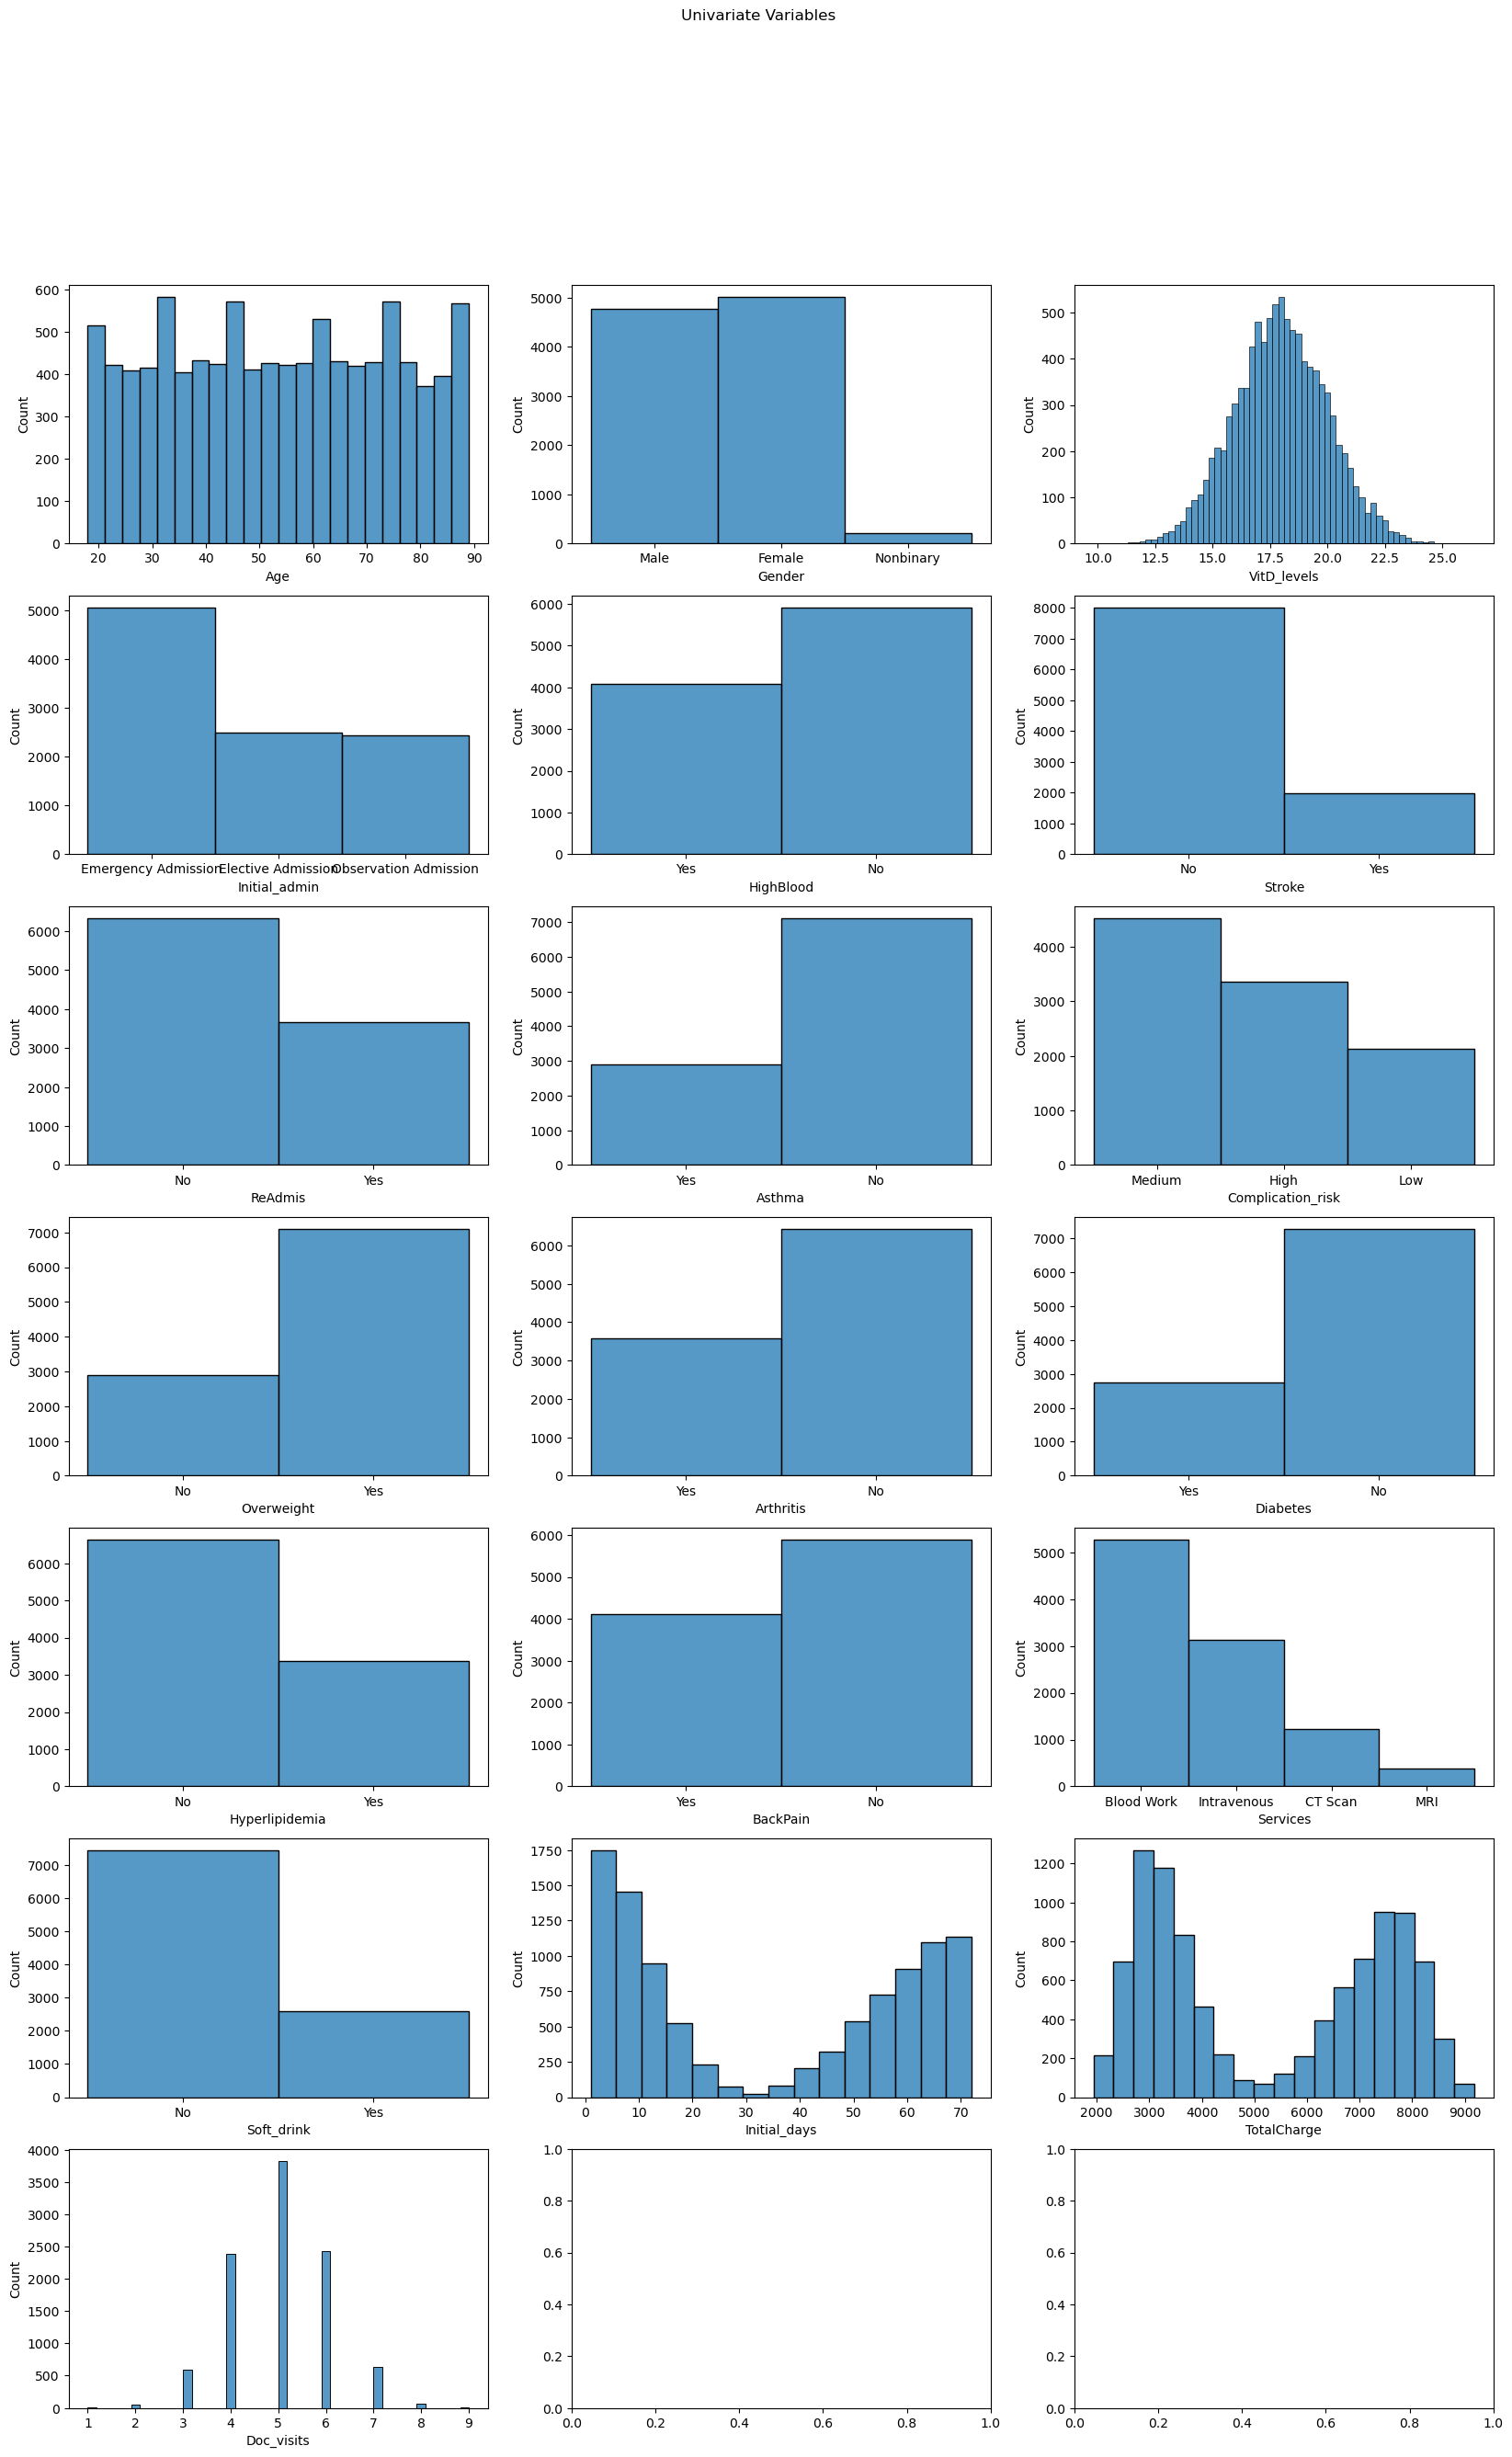

In [25]:
fig_rows, fig_cols = (7, 3)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20,30))

i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.histplot(data=medical_search, x=search_cols[i], ax=axes[row][col])
            #ax=axes[row][col].set_title(search_cols[i])
            i += 1
        except IndexError:
            break
            
plt.suptitle("Univariate Variables")
plt.show()

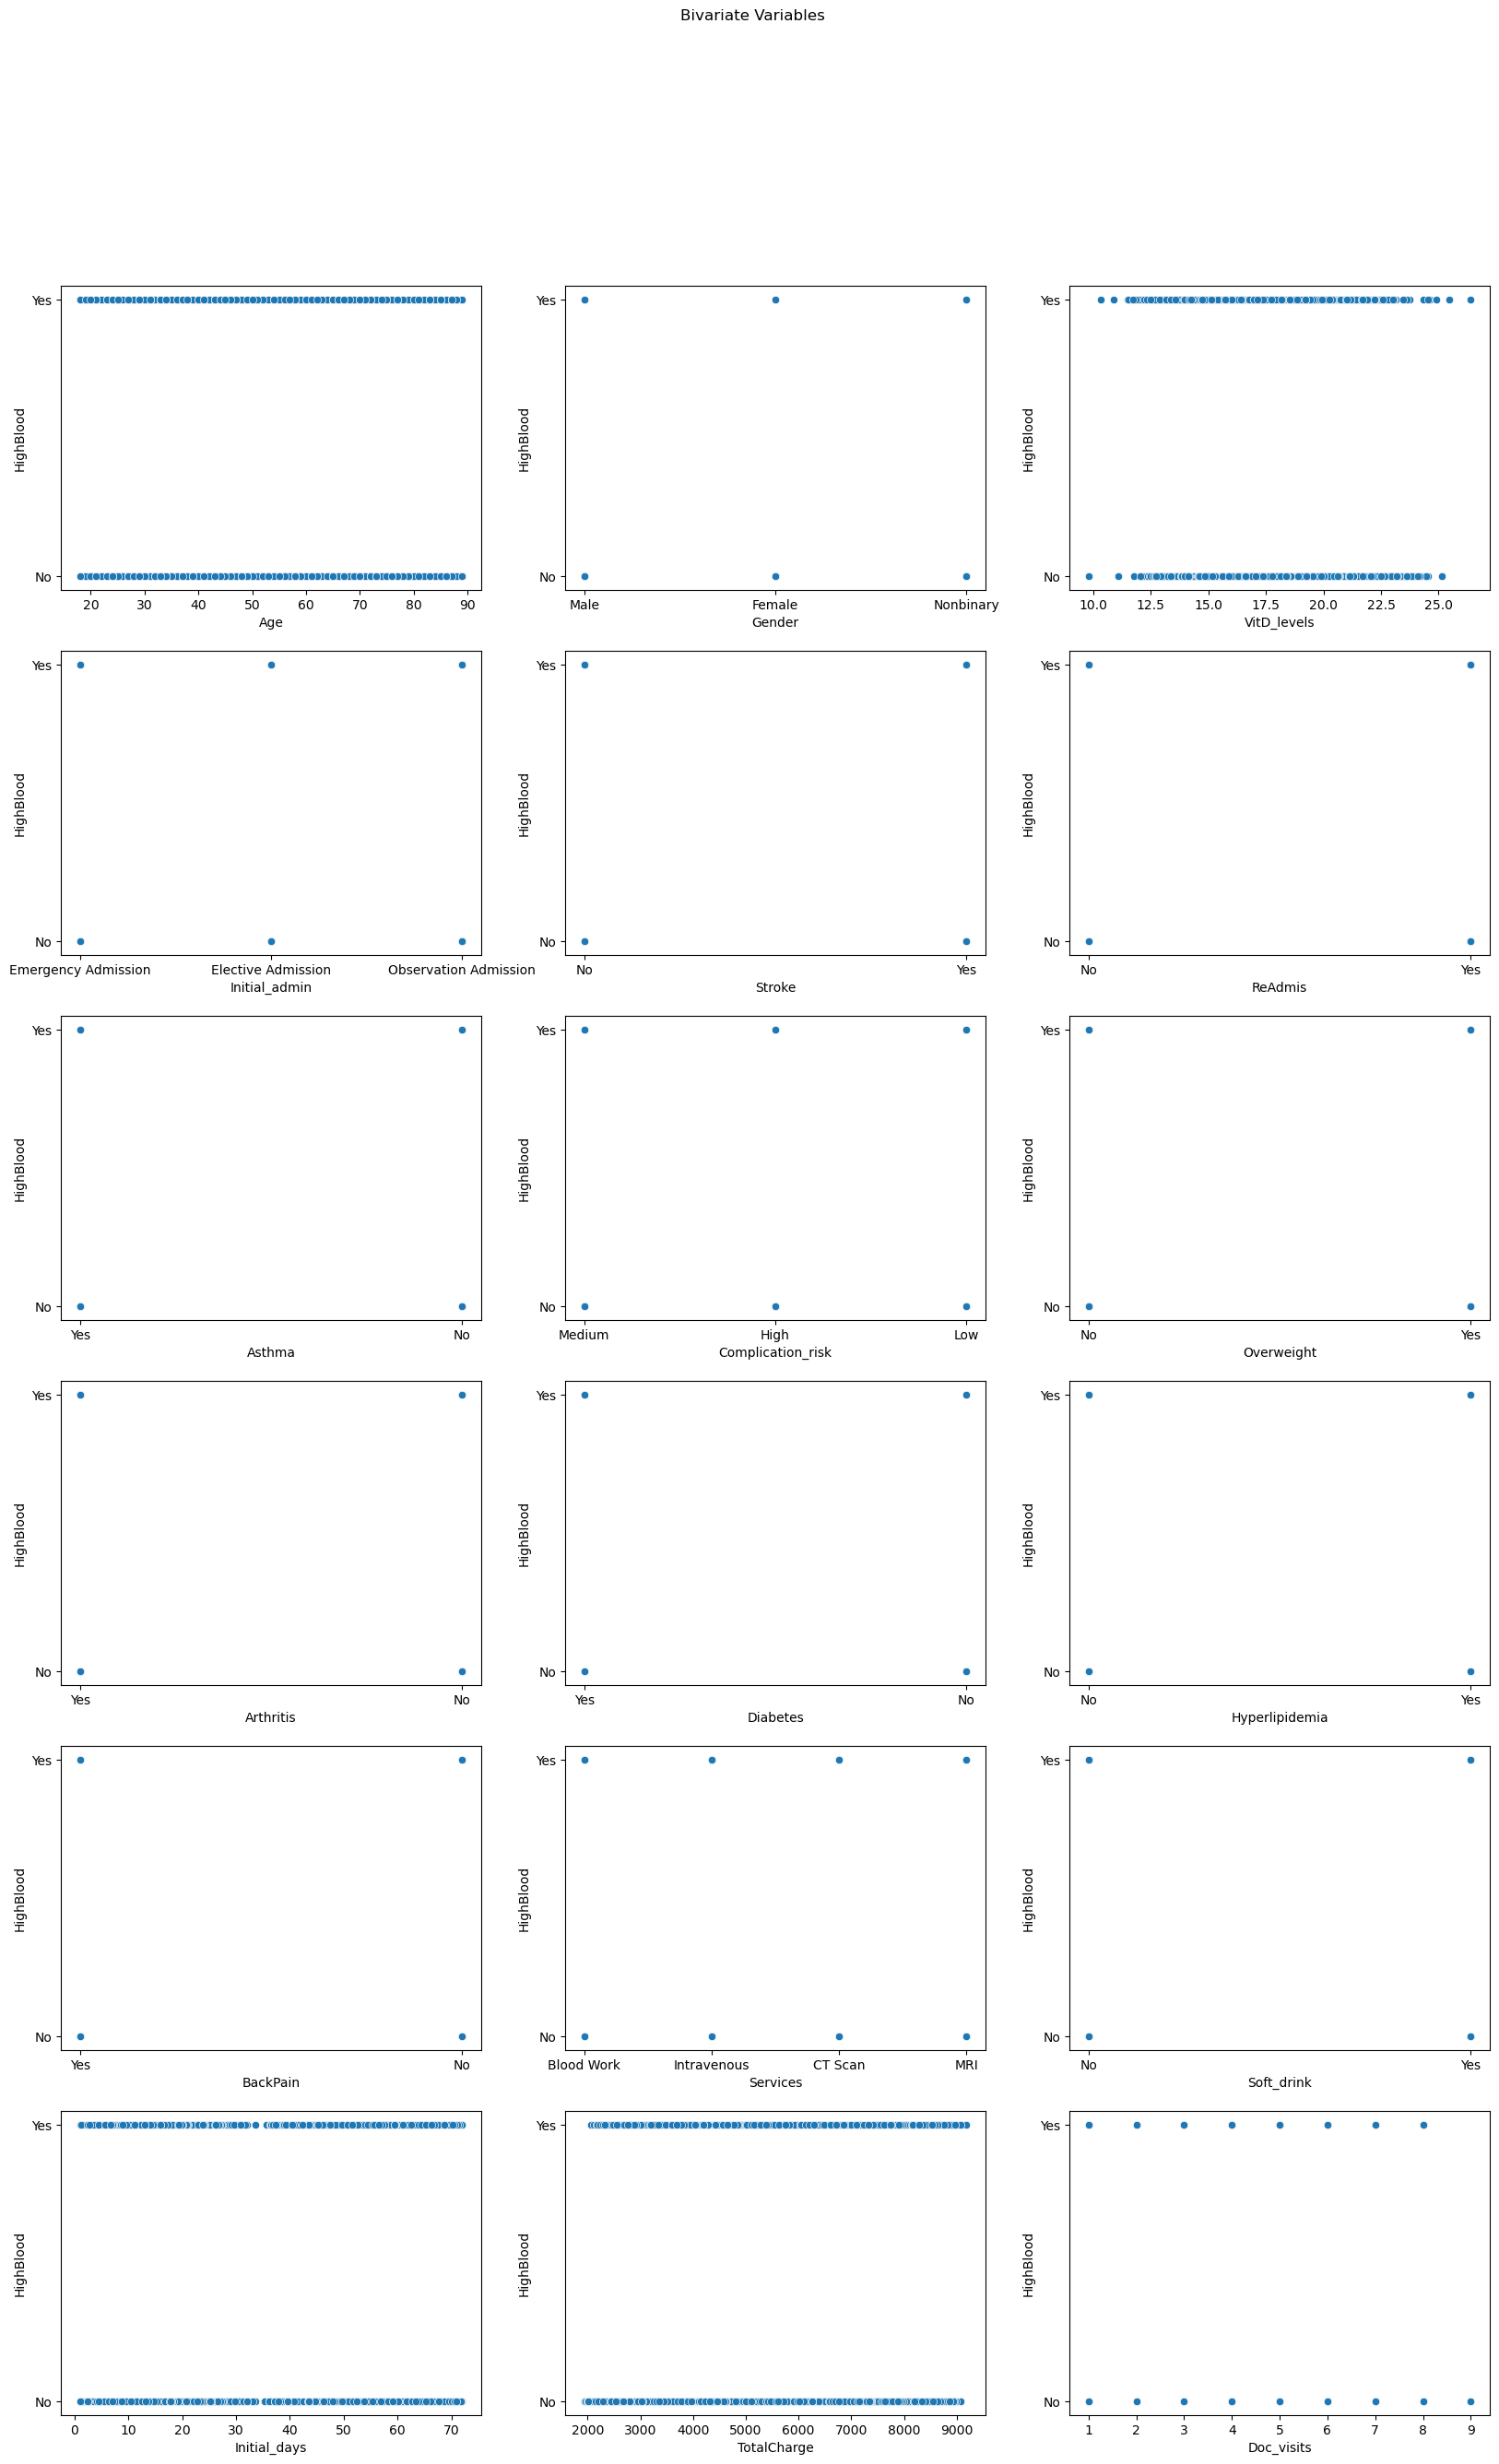

In [26]:
fig_rows, fig_cols = (6, 3)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20,30))
search_cols.remove('HighBlood')

i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.scatterplot(data=medical_search, x=search_cols[i], y='HighBlood', ax=axes[row][col])
            i += 1
        except IndexError:
            break
            
plt.suptitle("Bivariate Variables")
plt.show()

In [27]:
#one-hot encoding for categorical columns
initial_model = pd.get_dummies(medical_search, drop_first=True) #(Arham)
# medical_one_hot.info()
initial_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   VitD_levels                          10000 non-null  float64
 2   Initial_days                         10000 non-null  float64
 3   TotalCharge                          10000 non-null  float64
 4   Doc_visits                           10000 non-null  int64  
 5   Gender_Male                          10000 non-null  bool   
 6   Gender_Nonbinary                     10000 non-null  bool   
 7   Initial_admin_Emergency Admission    10000 non-null  bool   
 8   Initial_admin_Observation Admission  10000 non-null  bool   
 9   HighBlood_Yes                        10000 non-null  bool   
 10  Stroke_Yes                           10000 non-null  bool   
 11  ReAdmis_Yes                  

In [28]:
print(initial_model.columns)

Index(['Age', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Doc_visits',
       'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes',
       'ReAdmis_Yes', 'Asthma_Yes', 'Complication_risk_Low',
       'Complication_risk_Medium', 'Overweight_Yes', 'Arthritis_Yes',
       'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes',
       'Services_CT Scan', 'Services_Intravenous', 'Services_MRI',
       'Soft_drink_Yes'],
      dtype='object')


In [29]:
# update the invalid column names
initial_model.rename(columns={'Initial_admin_Emergency Admission':'Initial_admin_Emergency_Admission',
                              'Initial_admin_Observation Admission':'Initial_admin_Observation_Admission',
                              'Services_CT Scan':'Services_CT_Scan'}, inplace=True)
print(initial_model.columns)

Index(['Age', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Doc_visits',
       'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency_Admission',
       'Initial_admin_Observation_Admission', 'HighBlood_Yes', 'Stroke_Yes',
       'ReAdmis_Yes', 'Asthma_Yes', 'Complication_risk_Low',
       'Complication_risk_Medium', 'Overweight_Yes', 'Arthritis_Yes',
       'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes',
       'Services_CT_Scan', 'Services_Intravenous', 'Services_MRI',
       'Soft_drink_Yes'],
      dtype='object')


In [30]:
# make the column names into list
initial_cols = initial_model.columns.values.tolist()

In [31]:
# check the data types in medical_one_hot dataset
initial_model.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object)

In [32]:
# check the columns that are not float64
not_float = ['int64', 'bool']
not_float_cols = list(initial_model.select_dtypes(include=not_float))
not_float_cols

['Age',
 'Doc_visits',
 'Gender_Male',
 'Gender_Nonbinary',
 'Initial_admin_Emergency_Admission',
 'Initial_admin_Observation_Admission',
 'HighBlood_Yes',
 'Stroke_Yes',
 'ReAdmis_Yes',
 'Asthma_Yes',
 'Complication_risk_Low',
 'Complication_risk_Medium',
 'Overweight_Yes',
 'Arthritis_Yes',
 'Diabetes_Yes',
 'Hyperlipidemia_Yes',
 'BackPain_Yes',
 'Services_CT_Scan',
 'Services_Intravenous',
 'Services_MRI',
 'Soft_drink_Yes']

In [33]:
# update the data type from int & bool to float64

for col in not_float_cols:
    initial_model[col] = initial_model[col].astype(dtype='float64')
    
initial_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  float64
 1   VitD_levels                          10000 non-null  float64
 2   Initial_days                         10000 non-null  float64
 3   TotalCharge                          10000 non-null  float64
 4   Doc_visits                           10000 non-null  float64
 5   Gender_Male                          10000 non-null  float64
 6   Gender_Nonbinary                     10000 non-null  float64
 7   Initial_admin_Emergency_Admission    10000 non-null  float64
 8   Initial_admin_Observation_Admission  10000 non-null  float64
 9   HighBlood_Yes                        10000 non-null  float64
 10  Stroke_Yes                           10000 non-null  float64
 11  ReAdmis_Yes                  

In [34]:
# normalize the values based upon the min & max
initial_model_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(initial_model), columns=initial_model.columns)
initial_model_minmax_train = initial_model_minmax
initial_model_minmax_logit = initial_model_minmax
initial_model_minmax_logit.head() #(Keith)

,Age,VitD_levels,Initial_days,TotalCharge,Doc_visits,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,HighBlood_Yes,...,Complication_risk_Medium,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Services_CT_Scan,Services_Intravenous,Services_MRI,Soft_drink_Yes
0,0.492958,0.562756,0.135022,0.246933,0.625,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.464789,0.550632,0.199037,0.311343,0.375,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.492958,0.497410,0.053117,0.068475,0.375,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.845070,0.408150,0.010044,0.026168,0.375,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.056338,0.460128,0.003562,0.024130,0.500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [35]:
initial_model_minmax_logit.to_csv('medical_one_hot.csv')

In [36]:
#create dependent & independent variables
independent_cols = initial_model_minmax_logit.columns
independent_cols = independent_cols.drop('HighBlood_Yes')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'HighBlood_Yes ~ ' + variables

initial_log_reg_logit = smf.logit(variables_form, data=initial_model_minmax_logit).fit()
initial_log_reg_logit.summary() #(Logistic)

Optimization terminated successfully.
         Current function value: 0.361282
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HighBlood_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9976
Method:                           MLE   Df Model:                           23
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.4659
Time:                        13:31:24   Log-Likelihood:                -3612.8
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -18.4831      0.413    -44.772      0.000     -19.292     -17.674
Age                                     0.0475      0.102      0.467      0.640      -0.152       0.247
VitD_levels                             0.0971      0.244      0.398      0.691      -0.381       0.576
Initial_days                         -191.5729      3.762    -50.923      0.000    -198.946    -184.199
TotalCharge                           238.0143      4.672     50.946      0.000     228.858     247.171
Doc_visits                              0.0865      0.228      0.379      0.705      -0.361       0.534
Gender_Male                             0.1059      0.060      1.768      0.077      -0.012       0.223
Gender_Nonbinary                        0.2908      0.211      1.376      0.169      -0.124       0.705
Initial_admin_Emergency_Admission     -16.7912      0.337    -49.805      0.000     -17.452     -16.130
Initial_admin_Observation_Admission     0.1541      0.085      1.818      0.069      -0.012       0.320
Stroke_Yes                              0.1189      0.074      1.607      0.108      -0.026       0.264
ReAdmis_Yes                             0.3140      0.118      2.661      0.008       0.083       0.545
Asthma_Yes                             -0.0132      0.065     -0.201      0.841      -0.142       0.115
Complication_risk_Low                  13.4084      0.276     48.516      0.000      12.867      13.950
Complication_risk_Medium               13.6053      0.275     49.448      0.000      13.066      14.145
Overweight_Yes                          0.1785      0.066      2.717      0.007       0.050       0.307
Arthritis_Yes                          -2.4289      0.079    -30.881      0.000      -2.583      -2.275
Diabetes_Yes                           -2.4888      0.082    -30.317      0.000      -2.650      -2.328
Hyperlipidemia_Yes                     -3.0516      0.086    -35.397      0.000      -3.221      -2.883
BackPain_Yes                           -2.8573      0.082    -34.642      0.000      -3.019      -2.696
Services_CT_Scan                        0.0164      0.093      0.175      0.861      -0.167       0.199
Services_Intravenous                    0.0126      0.067      0.188      0.851      -0.119       0.144
Services_MRI                            0.1299      0.158      0.822      0.411      -0.180       0.439
Soft_drink_Yes                         -0.0562      0.068     -0.828      0.408      -0.189       0.077
=======================================================================================================
"""

In [37]:
# Set X and y 
y = initial_model_minmax_train['HighBlood_Yes']
X = initial_model_minmax_train.drop(columns = 'HighBlood_Yes')

# split the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 21)

# Check the dataset for X_train
X_train

,Age,VitD_levels,Initial_days,TotalCharge,Doc_visits,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,Stroke_Yes,...,Complication_risk_Medium,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Services_CT_Scan,Services_Intravenous,Services_MRI,Soft_drink_Yes
9185,0.971831,0.553289,0.862160,0.743545,0.500,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6945,0.985915,0.542043,0.912793,0.879063,0.500,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6615,0.732394,0.588011,0.741632,0.623970,0.500,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9527,0.295775,0.619065,0.898753,0.762996,0.375,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4336,0.239437,0.397557,0.012206,0.119214,0.625,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9336,0.788732,0.575566,0.959704,0.787208,0.500,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48,0.098592,0.430315,0.179460,0.238653,0.500,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8964,0.309859,0.446775,0.873029,0.790487,0.500,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5944,0.521127,0.760109,0.902993,0.747202,0.250,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
# Check the dataset for X_test
X_test

,Age,VitD_levels,Initial_days,TotalCharge,Doc_visits,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,Stroke_Yes,...,Complication_risk_Medium,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Services_CT_Scan,Services_Intravenous,Services_MRI,Soft_drink_Yes
3644,0.366197,0.527904,0.057770,0.102079,0.375,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1828,0.957746,0.239156,0.040818,0.077571,0.625,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6661,0.535211,0.432380,0.683666,0.599112,0.375,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9216,0.084507,0.506570,0.784922,0.648871,0.375,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5911,0.028169,0.429095,0.749799,0.760389,0.500,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886,0.943662,0.529816,0.785099,0.788736,0.375,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
713,0.605634,0.763919,0.271580,0.308876,0.500,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5055,0.084507,0.653661,0.775291,0.760422,0.500,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
789,0.591549,0.507510,0.089245,0.174128,0.375,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [39]:
initial_log_reg_train = LogisticRegression(random_state=0)
initial_log_reg_train.fit(X_train, y_train)
initial_log_reg_train.predict(X_train)

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
initial_log_reg_train.score(X_train, y_train)

0.6218571428571429

In [41]:
y_pred = initial_log_reg_train.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 1., 0.])

In [42]:
initial_log_reg_train.score(X_test, y_test)

0.6386666666666667

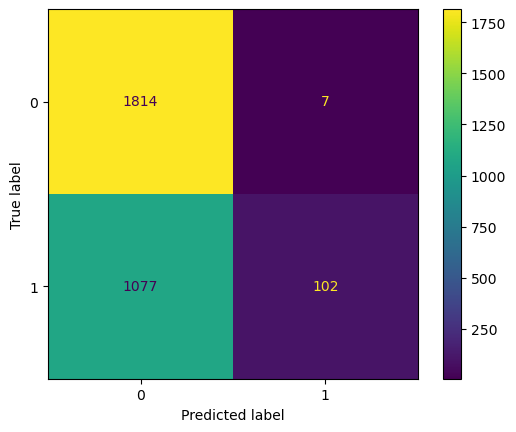

In [43]:
initial_cm = confusion_matrix(y_test, y_pred)
initial_cm_display = ConfusionMatrixDisplay(confusion_matrix = initial_cm, display_labels = [0, 1])
initial_cm_display.plot()
plt.show()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      1821
         1.0       0.94      0.09      0.16      1179

    accuracy                           0.64      3000
   macro avg       0.78      0.54      0.46      3000
weighted avg       0.75      0.64      0.53      3000



In [45]:
# Use RFE (Recursive Feature Elimination) to get the reduced logistic regression model
X = initial_model_minmax.drop(columns=['HighBlood_Yes'], axis=1)
y = initial_model_minmax['HighBlood_Yes']

In [46]:
reduced_log_reg_train = LogisticRegression()
rfe = RFE(reduced_log_reg_train, n_features_to_select=8)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=8)

In [47]:
# Check which columns will be removed and remained
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank{rfe.ranking_[i]}") #(Hackers Realm)

Age selected=False rank8
VitD_levels selected=False rank6
Initial_days selected=True rank1
TotalCharge selected=True rank1
Doc_visits selected=False rank4
Gender_Male selected=False rank12
Gender_Nonbinary selected=False rank2
Initial_admin_Emergency_Admission selected=True rank1
Initial_admin_Observation_Admission selected=False rank9
Stroke_Yes selected=False rank10
ReAdmis_Yes selected=False rank16
Asthma_Yes selected=False rank14
Complication_risk_Low selected=True rank1
Complication_risk_Medium selected=True rank1
Overweight_Yes selected=False rank5
Arthritis_Yes selected=False rank3
Diabetes_Yes selected=True rank1
Hyperlipidemia_Yes selected=True rank1
BackPain_Yes selected=True rank1
Services_CT_Scan selected=False rank7
Services_Intravenous selected=False rank15
Services_MRI selected=False rank11
Soft_drink_Yes selected=False rank13


In [48]:
# create another dataframe with reduced columns
reduced_independent_cols = ['Initial_days', 'TotalCharge', 'Initial_admin_Emergency_Admission', 'Complication_risk_Low', 
                            'Complication_risk_Medium', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'HighBlood_Yes']

reduced_model_minmax_train = initial_model_minmax[reduced_independent_cols]
reduced_model_minmax_logit = initial_model_minmax[reduced_independent_cols]

In [49]:
# Run the logit method with reduced model
reduced_independent_cols.remove('HighBlood_Yes')

variables = "".join([f"{col} + "for col in reduced_independent_cols])[:-3]
variables_form = 'HighBlood_Yes ~ ' + variables

reduced_log_reg_logit = smf.logit(variables_form, data=reduced_model_minmax_logit).fit()
reduced_log_reg_logit.summary() #(Logistic)

Optimization terminated successfully.
         Current function value: 0.425100
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HighBlood_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.3716
Time:                        13:33:53   Log-Likelihood:                -4251.0
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -13.8612      0.281    -49.288      0.000     -14.412     -13.310
Initial_days                       -139.0871      2.772    -50.172      0.000    -144.521    -133.654
TotalCharge                         173.0383      3.448     50.179      0.000     166.280     179.797
Initial_admin_Emergency_Admission   -12.2648      0.250    -49.026      0.000     -12.755     -11.774
Complication_risk_Low                 9.6931      0.209     46.454      0.000       9.284      10.102
Complication_risk_Medium              9.8687      0.206     47.890      0.000       9.465      10.273
Diabetes_Yes                         -1.8242      0.070    -25.915      0.000      -1.962      -1.686
Hyperlipidemia_Yes                   -2.2184      0.072    -30.945      0.000      -2.359      -2.078
BackPain_Yes                         -2.0333      0.068    -29.754      0.000      -2.167      -1.899
=====================================================================================================
"""

In [50]:
# Set X and y 
y = reduced_model_minmax_train['HighBlood_Yes']
X = reduced_model_minmax_train.drop(columns = 'HighBlood_Yes')

# split the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 21)

# Check the dataset for X_train
X_train

,Initial_days,TotalCharge,Initial_admin_Emergency_Admission,Complication_risk_Low,Complication_risk_Medium,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes
9185,0.862160,0.743545,0.0,0.0,1.0,0.0,1.0,1.0
6945,0.912793,0.879063,1.0,0.0,0.0,0.0,0.0,0.0
6615,0.741632,0.623970,0.0,0.0,1.0,0.0,1.0,0.0
9527,0.898753,0.762996,0.0,0.0,1.0,0.0,1.0,1.0
4336,0.012206,0.119214,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
9336,0.959704,0.787208,0.0,0.0,1.0,0.0,0.0,0.0
48,0.179460,0.238653,1.0,1.0,0.0,0.0,0.0,0.0
8964,0.873029,0.790487,1.0,0.0,1.0,1.0,0.0,0.0
5944,0.902993,0.747202,0.0,1.0,0.0,1.0,0.0,1.0


In [51]:
# Check the dataset for X_test
X_test

,Initial_days,TotalCharge,Initial_admin_Emergency_Admission,Complication_risk_Low,Complication_risk_Medium,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes
3644,0.057770,0.102079,0.0,0.0,1.0,0.0,0.0,1.0
1828,0.040818,0.077571,0.0,1.0,0.0,0.0,1.0,1.0
6661,0.683666,0.599112,0.0,0.0,1.0,0.0,1.0,1.0
9216,0.784922,0.648871,0.0,1.0,0.0,1.0,0.0,0.0
5911,0.749799,0.760389,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8886,0.785099,0.788736,1.0,0.0,0.0,1.0,0.0,0.0
713,0.271580,0.308876,1.0,0.0,1.0,0.0,0.0,1.0
5055,0.775291,0.760422,0.0,0.0,0.0,1.0,1.0,1.0
789,0.089245,0.174128,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
reduced_log_reg_train = LogisticRegression(random_state=0)
reduced_log_reg_train.fit(X_train, y_train)
reduced_log_reg_train.predict(X_train)

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
reduced_log_reg_train.score(X_train, y_train)

0.6235714285714286

In [54]:
y_pred = reduced_log_reg_train.predict(X_test)
y_pred

array([1., 0., 0., ..., 1., 0., 0.])

In [55]:
reduced_log_reg_train.score(X_test, y_test)

0.6496666666666666

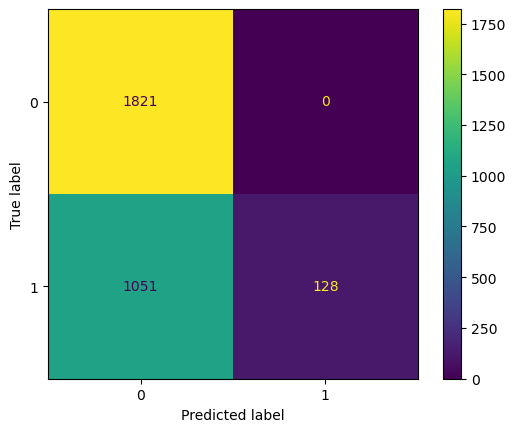

In [56]:
reduced_cm = confusion_matrix(y_test, y_pred)
reduced_cm_display = ConfusionMatrixDisplay(confusion_matrix = reduced_cm, display_labels = [0, 1])
reduced_cm_display.plot()
plt.show()

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.78      1821
         1.0       1.00      0.11      0.20      1179

    accuracy                           0.65      3000
   macro avg       0.82      0.55      0.49      3000
weighted avg       0.78      0.65      0.55      3000

